In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import scipy.misc
import re
import os
from numpy import genfromtxt

%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (12,12)
pd.options.display.max_columns = None
pd.options.display.precision = 4

In [2]:
import mne

# The file formats which could be used as inputs for our model are :
   1. File format for EEG data recorded by Brain Vision 
   2. File format for EEG data recorded by EEGlab
   3. File format for European Data Format

In [33]:
raw3 = mne.io.read_raw_brainvision("C:/Users/ayush/OneDrive/Desktop/ALL CONTROLLED SUBJECTS/558_CONTROLLED/558_raw.vhdr", preload=True)

Extracting parameters from C:/Users/ayush/OneDrive/Desktop/ALL CONTROLLED SUBJECTS/558_CONTROLLED/558_raw.vhdr...
Setting channel info structure...
Reading 0 ... 225469  =      0.000 ...   450.938 secs...


In [14]:
raw1 = mne.io.read_raw_edf("C:/Users/ayush/OneDrive/Desktop/ALL CONTROLLED SUBJECTS/558_CONTROLLED/558_raw.edf", preload=True)

Extracting EDF parameters from C:\Users\ayush\OneDrive\Desktop\ALL CONTROLLED SUBJECTS\558_CONTROLLED\558_raw.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 225499  =      0.000 ...   450.998 secs...


In [3]:
raw = mne.io.read_raw_eeglab("C:/Users/ayush/OneDrive/Desktop/ALL CONTROLLED SUBJECTS/558_CONTROLLED/558_raw.set", preload=True)

Reading C:/Users/ayush/OneDrive/Desktop/ALL CONTROLLED SUBJECTS/558_CONTROLLED\558_raw.fdt
Reading 0 ... 225469  =      0.000 ...   450.938 secs...


In [19]:
raw3.info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

In [16]:
raw1.info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2021-04-05 15:07:40 UTC
 nchan: 67
 projs: []
 sfreq: 500.0 Hz
>

In [24]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 66 items (66 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

Effective window size : 4.096 (s)


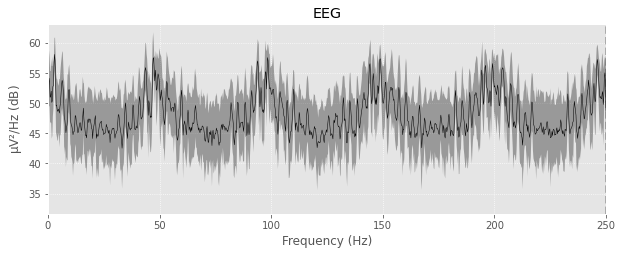

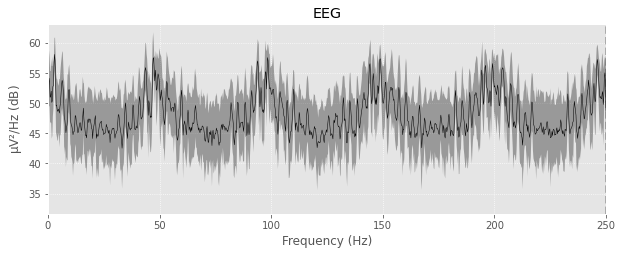

In [25]:
raw.plot_psd(average=True)

Effective window size : 4.096 (s)


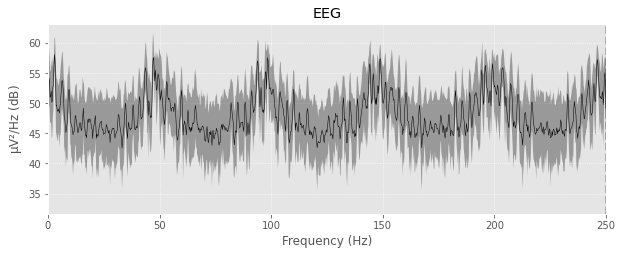

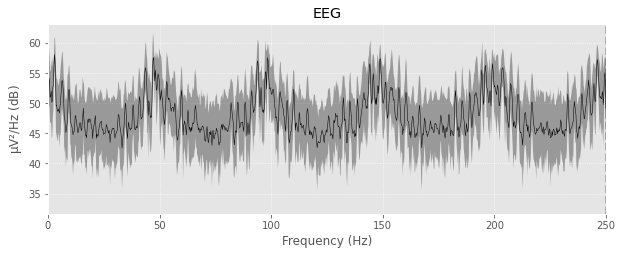

In [20]:
raw1.plot_psd(average=True)

Effective window size : 4.096 (s)


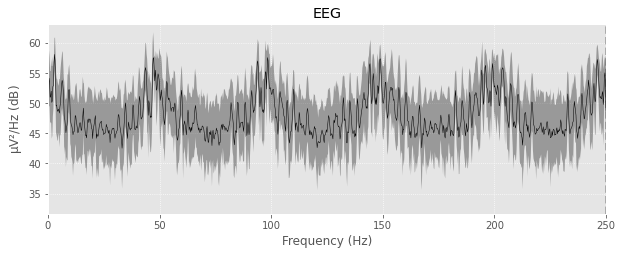

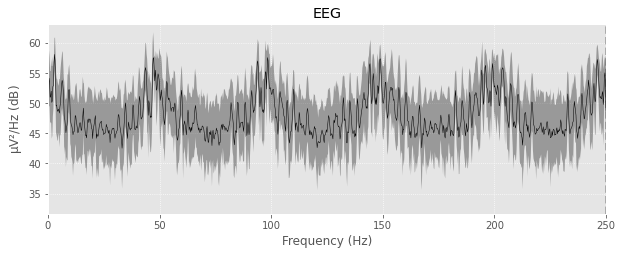

In [22]:
raw3.plot_psd(average=True)

# Rereferencing using the mastoid electrodes (M1,M2)

In [28]:
raw.set_eeg_reference(ref_channels=['M1', 'M2'])

EEG channel type selected for re-referencing
Applying a custom EEG reference.


<RawEEGLAB | 558_raw.fdt, 66 x 225470 (450.9 s), ~113.6 MB, data loaded>

In [26]:
raw1.set_eeg_reference(ref_channels=['M1', 'M2'])

EEG channel type selected for re-referencing
Applying a custom EEG reference.


<RawEDF | 558_raw.edf, 67 x 225500 (451.0 s), ~115.3 MB, data loaded>

In [27]:
raw3.set_eeg_reference(ref_channels=['M1', 'M2'])

EEG channel type selected for re-referencing
Applying a custom EEG reference.


<RawBrainVision | 558_raw.dat, 66 x 225470 (450.9 s), ~113.6 MB, data loaded>

In [8]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 67 EEG
 custom_ref_applied: True
 dig: 67 items (67 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 67
 projs: []
 sfreq: 500.0 Hz
>

# Band Pass Filtering

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Effective window size : 4.096 (s)


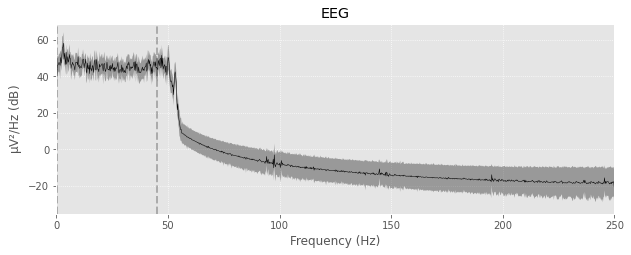

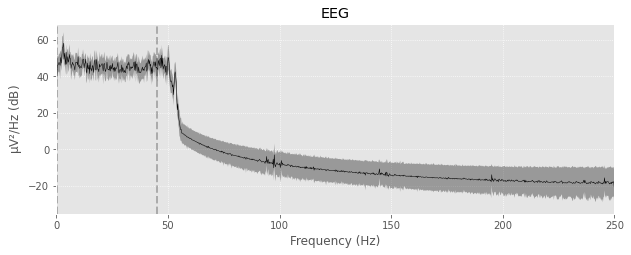

In [9]:
raw.filter(0.5, 45, fir_design='firwin')
raw.plot_psd(average=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Effective window size : 4.096 (s)


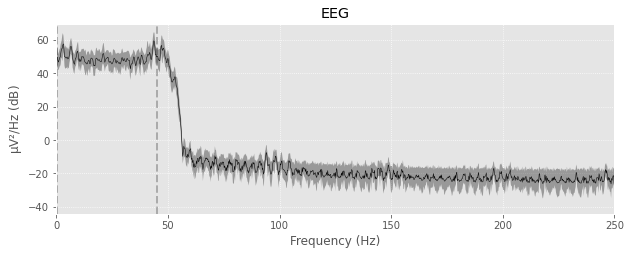

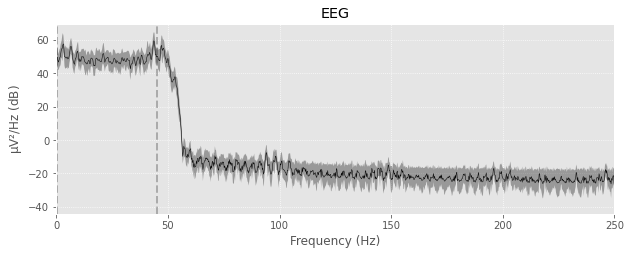

In [30]:
raw1.filter(0.5, 45, fir_design='firwin')
raw1.plot_psd(average=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Effective window size : 4.096 (s)


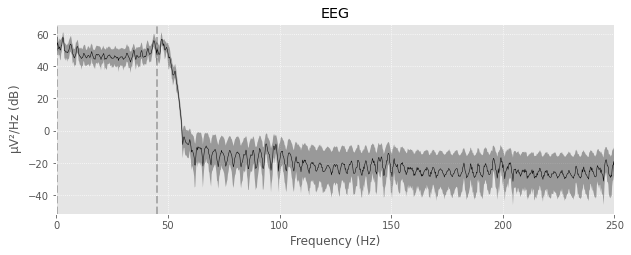

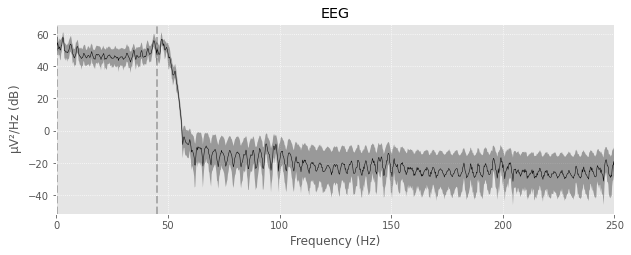

In [38]:
raw3.filter(0.5, 45, fir_design='firwin')
raw3.plot_psd(average=True)

In [10]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 67 EEG
 custom_ref_applied: True
 dig: 67 items (67 EEG)
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: unspecified
 nchan: 67
 projs: []
 sfreq: 500.0 Hz
>

# Downsampling

Effective window size : 8.192 (s)


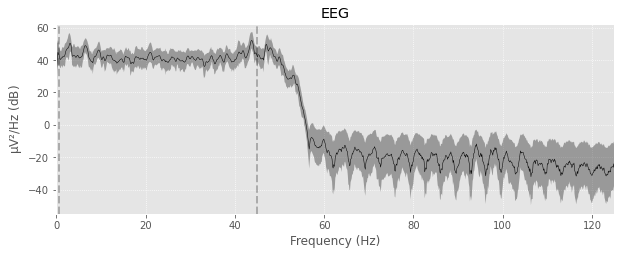

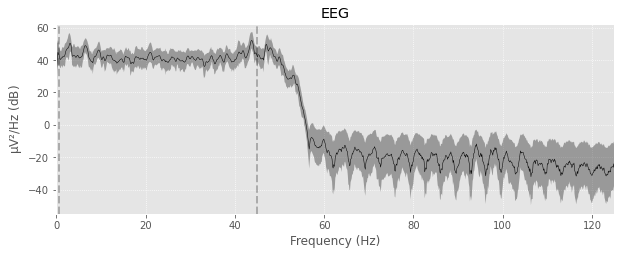

In [39]:
raw.resample(250, npad="auto")
raw.plot_psd(average=True)

856 events found
Event IDs: [ 1  2  3  4  5  6 11 12 13 14 15 16 17]
856 events found
Event IDs: [ 1  2  3  4  5  6 11 12 13 14 15 16 17]
Effective window size : 8.192 (s)


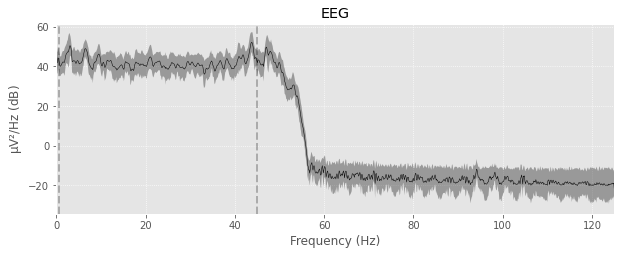

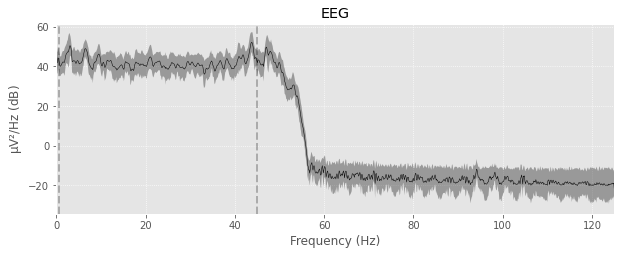

In [40]:
raw1.resample(250, npad="auto")
raw1.plot_psd(average=True)

Effective window size : 8.192 (s)


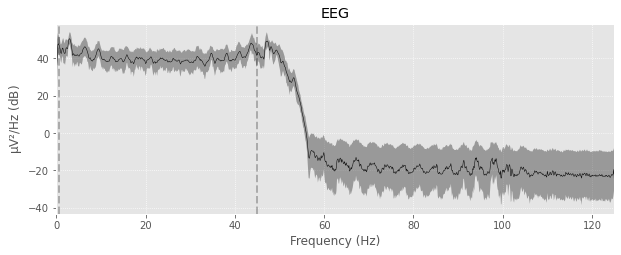

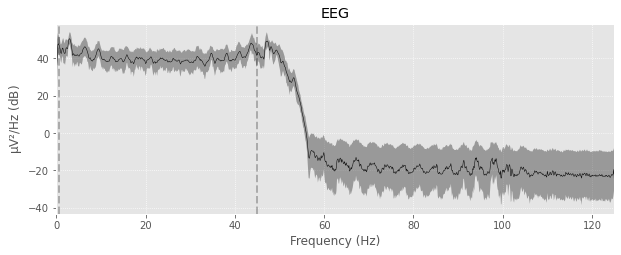

In [41]:
raw3.resample(250, npad="auto")
raw3.plot_psd(average=True)

In [42]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: True
 dig: 66 items (66 EEG)
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 250.0 Hz
>

In [44]:
raw1.info

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG, 1 STIM
 custom_ref_applied: True
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2021-04-05 15:07:40 UTC
 nchan: 67
 projs: []
 sfreq: 250.0 Hz
>

In [45]:
raw3.info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 250.0 Hz
>

# Removal of artifacts

In [12]:
raw.del_proj()

<RawEEGLAB | 586.fdt, 67 x 116074 (464.3 s), ~59.4 MB, data loaded>

In [46]:
raw1.del_proj()

<RawEDF | 558_raw.edf, 67 x 112750 (451.0 s), ~57.7 MB, data loaded>

In [47]:
raw3.del_proj()

<RawBrainVision | 558_raw.dat, 66 x 112735 (450.9 s), ~56.8 MB, data loaded>

# Remove Bad Channels

In [55]:
bad_channels=['CB1', 'CB2', 'HEOG', 'VEOG', 'EKG','M1','M2','Status']

In [56]:
x=raw.ch_names
x1=raw1.ch_names
x3=raw3.ch_names
x1

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'M1',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'CB1',
 'O1',
 'OZ',
 'O2',
 'CB2',
 'HEOG',
 'VEOG',
 'Status']

In [57]:
channels_to_remove = []
for i in x:
    for j in bad_channels:
        if i==j:
            channels_to_remove.append(i)

In [58]:
channels_to_remove

['M1', 'M2', 'CB1', 'CB2', 'HEOG', 'VEOG']

In [17]:
raw.info ['bads'] = ['CB1', 'CB2', 'HEOG', 'VEOG', 'EKG']

In [18]:
raw.info

<Info | 10 non-empty values
 bads: 5 items (CB1, CB2, HEOG, VEOG, EKG)
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 67 EEG
 custom_ref_applied: True
 dig: 67 items (67 EEG)
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: unspecified
 nchan: 67
 projs: []
 sfreq: 250.0 Hz
>

In [19]:
raw.drop_channels(ch_names=channels_to_remove)

<RawEEGLAB | 586.fdt, 60 x 116074 (464.3 s), ~53.2 MB, data loaded>

In [20]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 60 EEG
 custom_ref_applied: True
 dig: 67 items (67 EEG)
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: unspecified
 nchan: 60
 projs: []
 sfreq: 250.0 Hz
>

In [21]:
len(raw.ch_names)

60

In [22]:
raw.ch_names

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'O1',
 'OZ',
 'O2']

# Run ICA 

In [23]:
#removing low frequency drifts
raw_tmp = raw.copy()
raw_tmp.filter(1, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)



<RawEEGLAB | 586.fdt, 60 x 116074 (464.3 s), ~53.2 MB, data loaded>

In [24]:
ica = mne.preprocessing.ICA(method="fastica",random_state=1)

In [25]:
ica.fit(raw_tmp)

Fitting ICA to data using 60 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 60 components
Fitting ICA took 27.0s.


<ICA | raw data decomposition, fit (fastica): 116074 samples, 60 components, channels used: "eeg">

In [26]:
len(raw.ch_names)

60

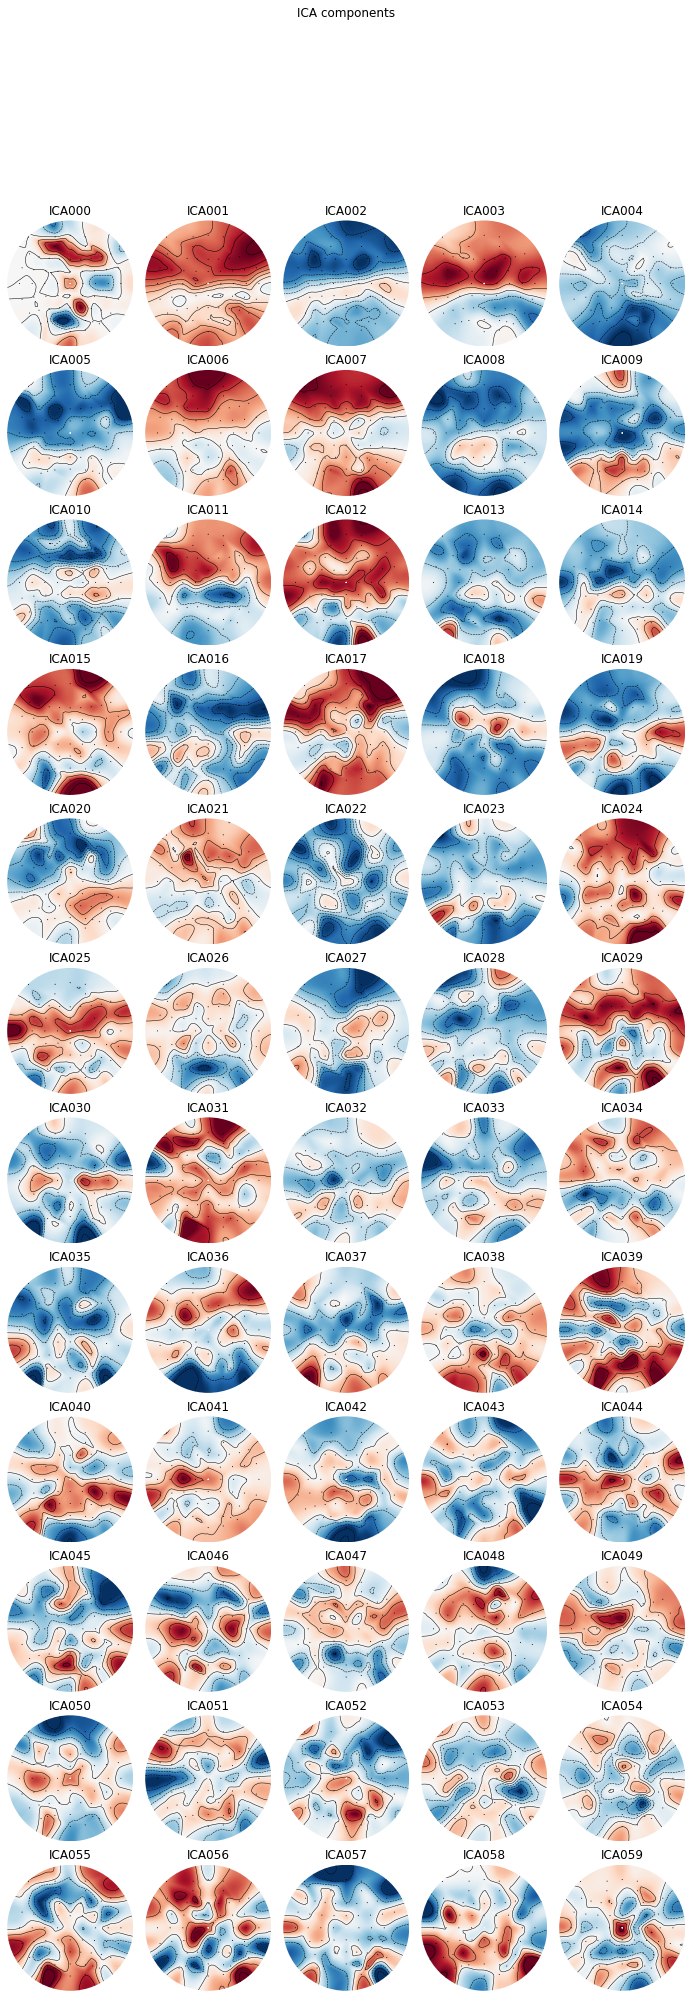

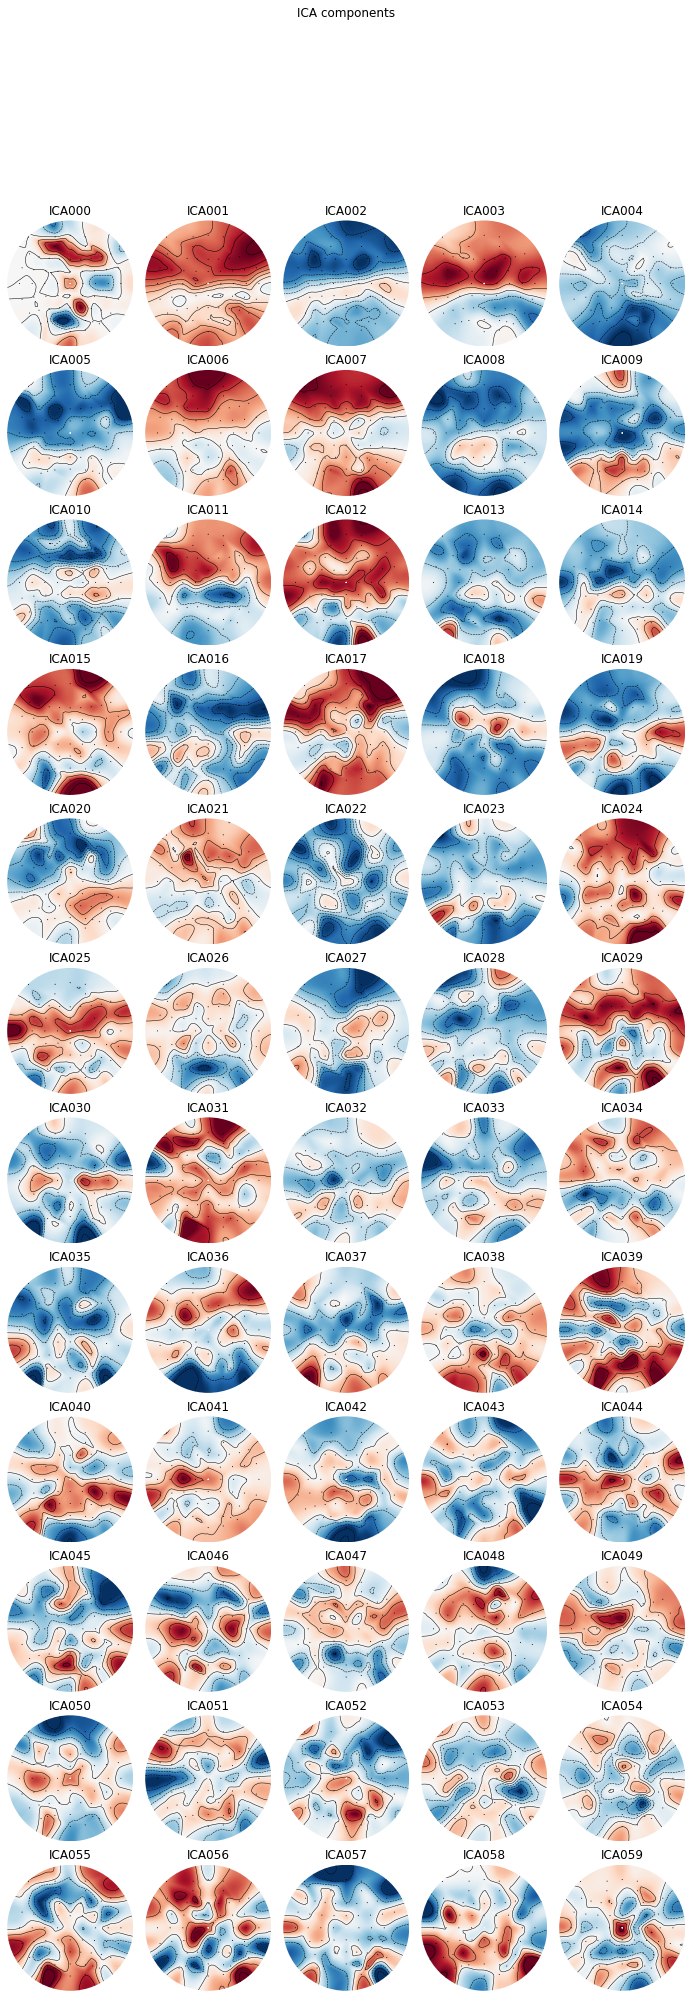

In [27]:
picks = len(raw.ch_names)

ica.plot_components(inst=raw_tmp, picks=range(len(raw.ch_names)), sphere=0.148)

Creating RawArray with float64 data, n_channels=60, n_times=116074
    Range : 0 ... 116073 =      0.000 ...   464.292 secs
Ready.


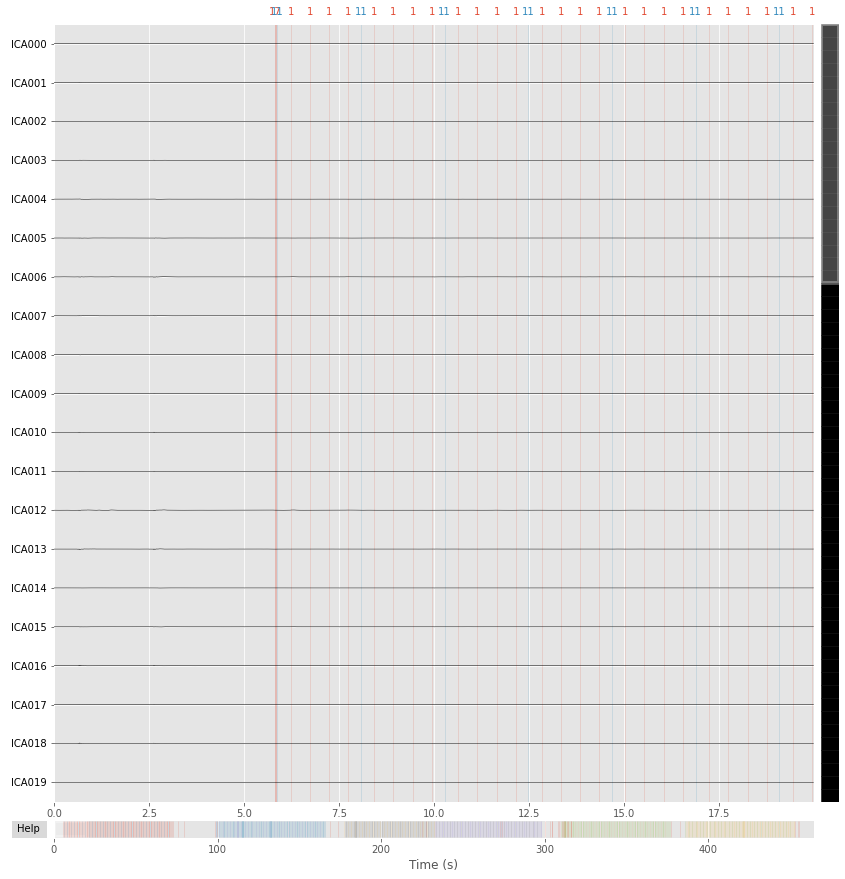

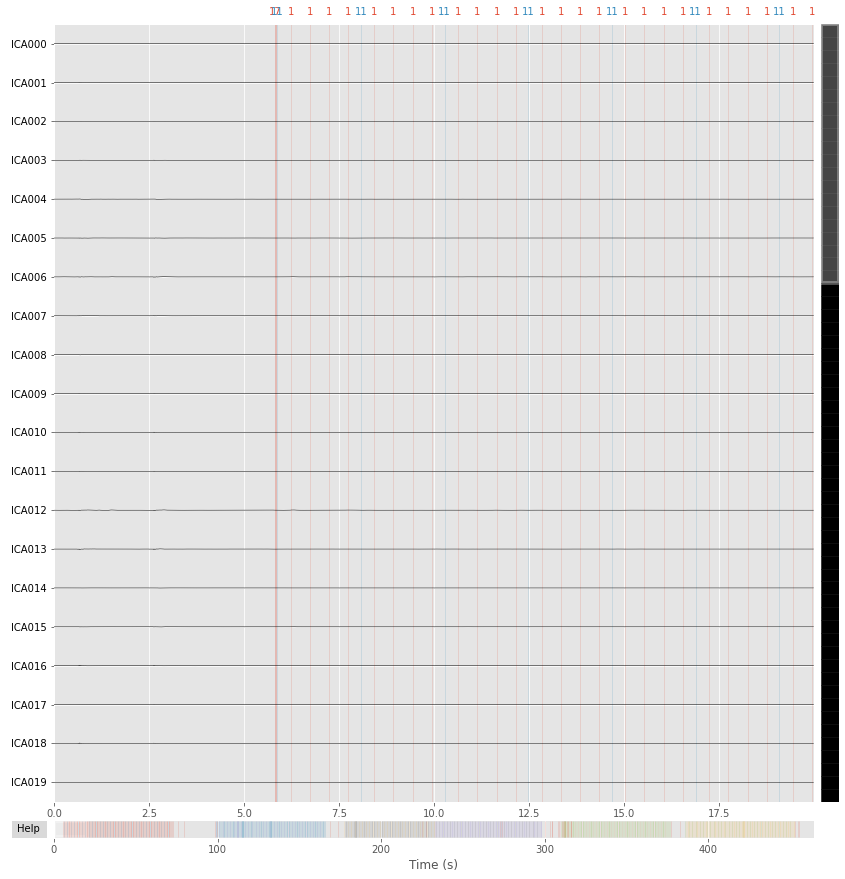

In [28]:
ica.plot_sources(inst=raw_tmp)

In [29]:
ica.exclude = [0,1]
raw_corrected = raw.copy()
ica.apply(raw_corrected)

Applying ICA to Raw instance
    Transforming to ICA space (60 components)
    Zeroing out 2 ICA components
    Projecting back using 60 PCA components


<RawEEGLAB | 586.fdt, 60 x 116074 (464.3 s), ~53.2 MB, data loaded>

Applying ICA to Raw instance
    Transforming to ICA space (60 components)
    Zeroing out 2 ICA components
    Projecting back using 60 PCA components


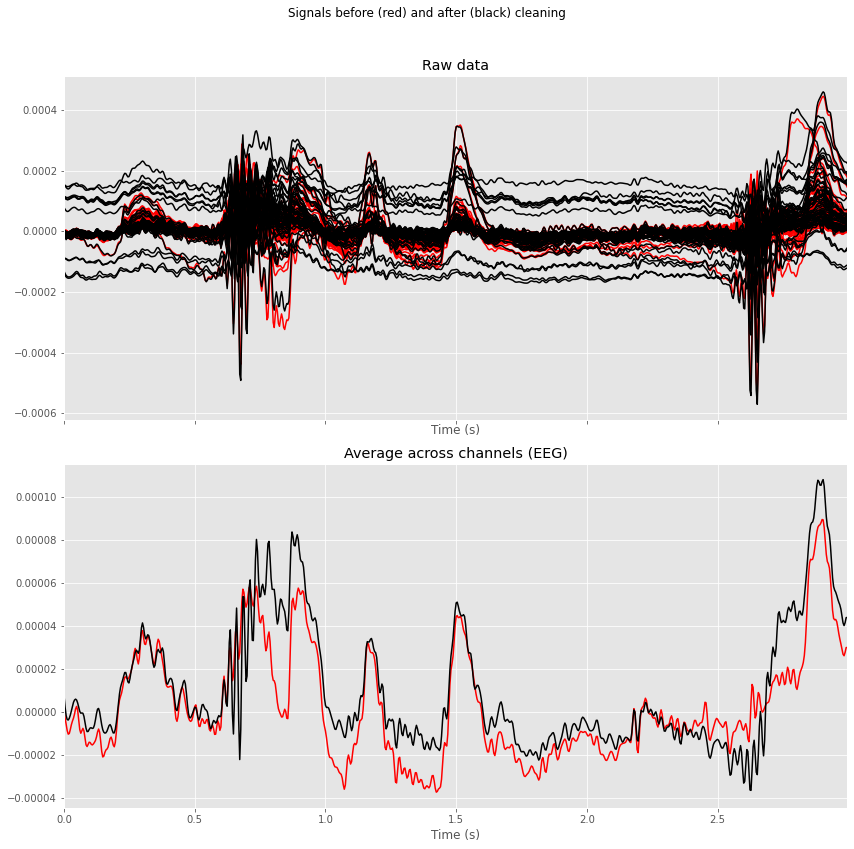

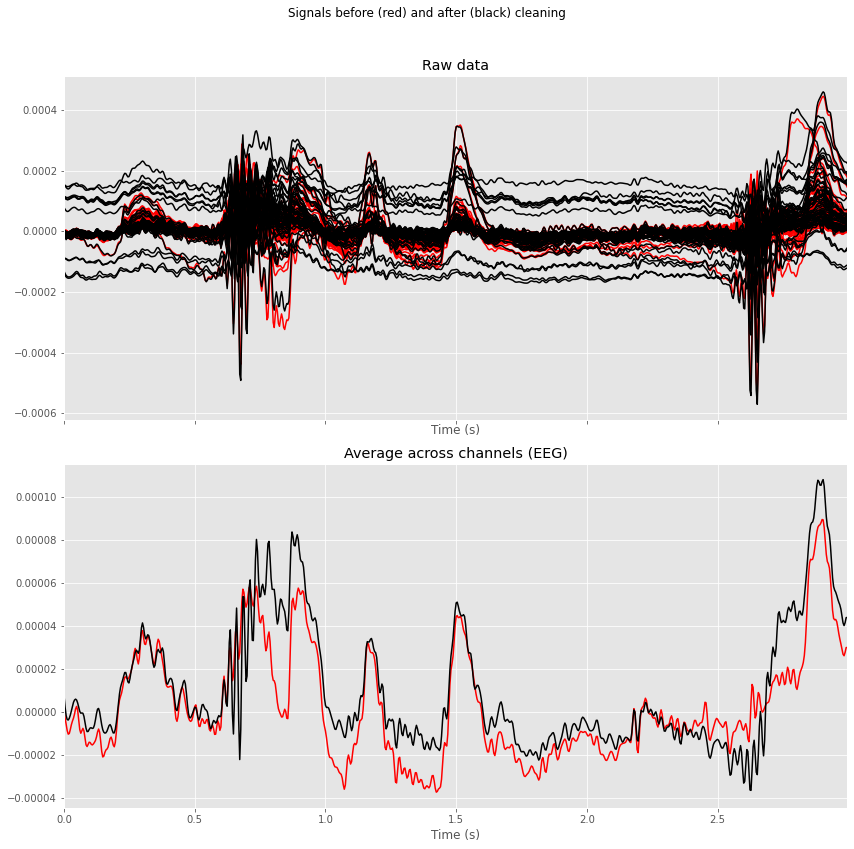

In [30]:
ica.plot_overlay(raw, exclude=[1], picks='eeg')

In [88]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 60 EEG
 custom_ref_applied: True
 dig: 67 items (67 EEG)
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: unspecified
 nchan: 60
 projs: []
 sfreq: 250.0 Hz
>

In [96]:
df = raw.to_data_frame()

In [97]:
df

time         FP1         FPZ         FP2         AF3         AF4  \
0            0     -0.0047 -7.5219e-03     -0.0243 -1.6793e-02 -3.0537e-03   
1            4     -1.3866  1.3816e-01      0.3272  7.4022e-01  1.3722e+00   
2            8     -4.4579 -1.4835e+00     -2.0654 -2.4499e-02  3.7889e-01   
3           12     -8.8154 -4.3222e+00     -5.9995 -2.1040e+00 -2.5535e+00   
4           16    -12.3151 -6.1758e+00     -8.0049 -4.0844e+00 -4.7532e+00   
...        ...         ...         ...         ...         ...         ...   
116069  464276  -6101.8679 -2.2324e+04  39887.7297  3.1544e+05  9.0153e+03   
116070  464280  16373.1799 -5.2443e+04  66478.9739  3.7605e+05  3.3554e+04   
116071  464284  36520.9268 -6.5091e+04  69556.8336  3.7944e+05  4.8589e+04   
116072  464288  31116.6049 -4.5326e+04  44092.4275  2.4781e+05  3.6331e+04   
116073  464292      0.0001  1.5603e-05      0.0001  6.5082e-05 -8.5195e-05   

                F7          F5          F3          F1           FZ  \
0      -1.2914e-03  8.4130e-04  1.7950e-03 -7.0982e-03      -0.0047   
1       8.7477e-01 -2.1387e-01 -4.6937e-01 -1.3082e+00      -1.3197   
2       5.5022e-01 -1.0255e+00 -1.7496e+00 -2.9010e+00      -3.5634   
3      -1.0222e+00 -2.3554e+00 -3.4490e+00 -4.3599e+00      -6.0922   
4      -2.6475e+00 -3.3594e+00 -4.1429e+00 -4.8751e+00      -7.2324   
...            ...         ...         ...         ...          ...   
116069 -2.9204e+03  2.0430e+04  1.9404e+04  8.4044e+03  238387.1173   
116070  5.7145e+04  1.2114e+05  6.3819e+04 -1.4455e+04  253358.2726   
116071  1.0334e+05  1.8960e+05  9.0024e+04 -3.5147e+04  231976.6054   
116072  8.3161e+04  1.4591e+05  6.6667e+04 -3.0393e+04  143308.0595   
116073 -1.8047e-06 -4.7738e-05 -8.8158e-05 -9.3064e-05      -0.0001   

                 F2          F4          F6          F8         FT7  \
0           -0.0148 -1.7665e-02 -6.6293e-03 -1.2495e-03  1.6372e-03   
1           -0.2631  1.0837e+00  3.3402e+00  6.4366e-02 -3.3749e+00   
2           -2.2872 -6.8207e-01  3.6624e+00 -6.7047e-01 -6.2787e+00   
3           -5.4673 -4.6815e+00  1.1179e+00 -1.7896e+00 -8.3337e+00   
4           -7.6430 -7.8792e+00 -1.4426e+00 -2.0866e+00 -9.1535e+00   
...             ...         ...         ...         ...         ...   
116069  238353.0814  2.4314e+05  2.3483e+05  4.7937e+03  2.6714e+04   
116070  253423.4543  2.8899e+05  3.0806e+05  4.0440e+04  8.7828e+04   
116071  232117.5624  2.8885e+05  3.3261e+05  6.5902e+04  1.2321e+05   
116072  143424.7885  1.8732e+05  2.2480e+05  5.1451e+04  9.0927e+04   
116073      -0.0001 -6.1884e-05 -6.8691e-05 -7.1513e-05 -3.8555e-05   

               FC5         FC3         FC1         FCZ         FC2  \
0       7.0922e-03      0.0031      0.0051      0.0115      0.0015   
1      -1.8303e+00     -2.9384     -2.7157     -3.3291     -0.6593   
2      -3.6492e+00     -5.5070     -5.5085     -6.5355     -3.1064   
3      -5.2905e+00     -7.2382     -7.7300     -8.9929     -6.7984   
4      -6.2343e+00     -7.6002     -8.1931     -9.5961     -9.2358   
...            ...         ...         ...         ...         ...   
116069  4.8077e+03   4805.4884   4816.1808   4794.1886   4757.4590   
116070  4.0124e+04  40117.7941  40125.8985  40109.4030  40081.7403   
116071  6.5313e+04  65305.3112  65310.8091  65299.8125  65281.2946   
116072  5.0971e+04  50965.5889  50968.3684  50962.8698  50953.5706   
116073 -8.8755e-05     -0.0002     -0.0002     -0.0002     -0.0002   

               FC4         FC6         FT8          T7          C5  \
0       1.9235e-04 -1.8580e-03  3.4861e-03     -0.0035     -0.0056   
1       2.5703e+00  2.8030e+00  2.2850e+00    -17.3992     -4.6077   
2       8.3479e-01  2.8222e+00  1.9020e+00    -23.2054     -7.5878   
3      -4.6399e+00 -3.7209e-02 -8.4201e-01    -17.2675     -8.5154   
4      -9.2025e+00 -3.2806e+00 -3.0819e+00     -9.7531     -8.3447   
...            ...         ...         ...         ...         ...   
116069  4.8018e+03  4.8079e+03  4.78

In [98]:
df=df.set_index('time')

In [99]:
df

FP1         FPZ         FP2         AF3         AF4  \
time                                                                 
0          -0.0047 -7.5219e-03     -0.0243 -1.6793e-02 -3.0537e-03   
4          -1.3866  1.3816e-01      0.3272  7.4022e-01  1.3722e+00   
8          -4.4579 -1.4835e+00     -2.0654 -2.4499e-02  3.7889e-01   
12         -8.8154 -4.3222e+00     -5.9995 -2.1040e+00 -2.5535e+00   
16        -12.3151 -6.1758e+00     -8.0049 -4.0844e+00 -4.7532e+00   
...            ...         ...         ...         ...         ...   
464276  -6101.8679 -2.2324e+04  39887.7297  3.1544e+05  9.0153e+03   
464280  16373.1799 -5.2443e+04  66478.9739  3.7605e+05  3.3554e+04   
464284  36520.9268 -6.5091e+04  69556.8336  3.7944e+05  4.8589e+04   
464288  31116.6049 -4.5326e+04  44092.4275  2.4781e+05  3.6331e+04   
464292      0.0001  1.5603e-05      0.0001  6.5082e-05 -8.5195e-05   

                F7          F5          F3          F1           FZ  \
time                                                                  
0      -1.2914e-03  8.4130e-04  1.7950e-03 -7.0982e-03      -0.0047   
4       8.7477e-01 -2.1387e-01 -4.6937e-01 -1.3082e+00      -1.3197   
8       5.5022e-01 -1.0255e+00 -1.7496e+00 -2.9010e+00      -3.5634   
12     -1.0222e+00 -2.3554e+00 -3.4490e+00 -4.3599e+00      -6.0922   
16     -2.6475e+00 -3.3594e+00 -4.1429e+00 -4.8751e+00      -7.2324   
...            ...         ...         ...         ...          ...   
464276 -2.9204e+03  2.0430e+04  1.9404e+04  8.4044e+03  238387.1173   
464280  5.7145e+04  1.2114e+05  6.3819e+04 -1.4455e+04  253358.2726   
464284  1.0334e+05  1.8960e+05  9.0024e+04 -3.5147e+04  231976.6054   
464288  8.3161e+04  1.4591e+05  6.6667e+04 -3.0393e+04  143308.0595   
464292 -1.8047e-06 -4.7738e-05 -8.8158e-05 -9.3064e-05      -0.0001   

                 F2          F4          F6          F8         FT7  \
time                                                                  
0           -0.0148 -1.7665e-02 -6.6293e-03 -1.2495e-03  1.6372e-03   
4           -0.2631  1.0837e+00  3.3402e+00  6.4366e-02 -3.3749e+00   
8           -2.2872 -6.8207e-01  3.6624e+00 -6.7047e-01 -6.2787e+00   
12          -5.4673 -4.6815e+00  1.1179e+00 -1.7896e+00 -8.3337e+00   
16          -7.6430 -7.8792e+00 -1.4426e+00 -2.0866e+00 -9.1535e+00   
...             ...         ...         ...         ...         ...   
464276  238353.0814  2.4314e+05  2.3483e+05  4.7937e+03  2.6714e+04   
464280  253423.4543  2.8899e+05  3.0806e+05  4.0440e+04  8.7828e+04   
464284  232117.5624  2.8885e+05  3.3261e+05  6.5902e+04  1.2321e+05   
464288  143424.7885  1.8732e+05  2.2480e+05  5.1451e+04  9.0927e+04   
464292      -0.0001 -6.1884e-05 -6.8691e-05 -7.1513e-05 -3.8555e-05   

               FC5         FC3         FC1         FCZ         FC2  \
time                                                                 
0       7.0922e-03      0.0031      0.0051      0.0115      0.0015   
4      -1.8303e+00     -2.9384     -2.7157     -3.3291     -0.6593   
8      -3.6492e+00     -5.5070     -5.5085     -6.5355     -3.1064   
12     -5.2905e+00     -7.2382     -7.7300     -8.9929     -6.7984   
16     -6.2343e+00     -7.6002     -8.1931     -9.5961     -9.2358   
...            ...         ...         ...         ...         ...   
464276  4.8077e+03   4805.4884   4816.1808   4794.1886   4757.4590   
464280  4.0124e+04  40117.7941  40125.8985  40109.4030  40081.7403   
464284  6.5313e+04  65305.3112  65310.8091  65299.8125  65281.2946   
464288  5.0971e+04  50965.5889  50968.3684  50962.8698  50953.5706   
464292 -8.8755e-05     -0.0002     -0.0002     -0.0002     -0.0002   

               FC4         FC6         FT8          T7          C5  \
time                                                                 
0       1.9235e-04 -1.8580e-03  3.4861e-03     -0.0035     -0.0056   
4       2.5703e+00  2.8030e+00  2.2850e+00    -17.3992     -4.6077   
8       8.3479e-01  2.8222e+00  1.9020e+00    -23.2054     -7.587

In [109]:
numberofelectrodes = len(df.columns)
numberofelectrodes

60

In [110]:
electrodes = list(df.columns)
electrodes

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'O1',
 'OZ',
 'O2']

In [114]:
res = {}
j=0
for i in electrodes:
    res[i]=j
    j+=1

In [115]:
res

{'FP1': 0,
 'FPZ': 1,
 'FP2': 2,
 'AF3': 3,
 'AF4': 4,
 'F7': 5,
 'F5': 6,
 'F3': 7,
 'F1': 8,
 'FZ': 9,
 'F2': 10,
 'F4': 11,
 'F6': 12,
 'F8': 13,
 'FT7': 14,
 'FC5': 15,
 'FC3': 16,
 'FC1': 17,
 'FCZ': 18,
 'FC2': 19,
 'FC4': 20,
 'FC6': 21,
 'FT8': 22,
 'T7': 23,
 'C5': 24,
 'C3': 25,
 'C1': 26,
 'CZ': 27,
 'C2': 28,
 'C4': 29,
 'C6': 30,
 'T8': 31,
 'TP7': 32,
 'CP5': 33,
 'CP3': 34,
 'CP1': 35,
 'CPZ': 36,
 'CP2': 37,
 'CP4': 38,
 'CP6': 39,
 'TP8': 40,
 'P7': 41,
 'P5': 42,
 'P3': 43,
 'P1': 44,
 'PZ': 45,
 'P2': 46,
 'P4': 47,
 'P6': 48,
 'P8': 49,
 'PO7': 50,
 'PO5': 51,
 'PO3': 52,
 'POZ': 53,
 'PO4': 54,
 'PO6': 55,
 'PO8': 56,
 'O1': 57,
 'OZ': 58,
 'O2': 59}

In [116]:
df=df.rename(columns=res)

In [117]:
df

0           1           2           3           4   \
time                                                                 
0          -0.0047 -7.5219e-03     -0.0243 -1.6793e-02 -3.0537e-03   
4          -1.3866  1.3816e-01      0.3272  7.4022e-01  1.3722e+00   
8          -4.4579 -1.4835e+00     -2.0654 -2.4499e-02  3.7889e-01   
12         -8.8154 -4.3222e+00     -5.9995 -2.1040e+00 -2.5535e+00   
16        -12.3151 -6.1758e+00     -8.0049 -4.0844e+00 -4.7532e+00   
...            ...         ...         ...         ...         ...   
464276  -6101.8679 -2.2324e+04  39887.7297  3.1544e+05  9.0153e+03   
464280  16373.1799 -5.2443e+04  66478.9739  3.7605e+05  3.3554e+04   
464284  36520.9268 -6.5091e+04  69556.8336  3.7944e+05  4.8589e+04   
464288  31116.6049 -4.5326e+04  44092.4275  2.4781e+05  3.6331e+04   
464292      0.0001  1.5603e-05      0.0001  6.5082e-05 -8.5195e-05   

                5           6           7           8            9   \
time                                                                  
0      -1.2914e-03  8.4130e-04  1.7950e-03 -7.0982e-03      -0.0047   
4       8.7477e-01 -2.1387e-01 -4.6937e-01 -1.3082e+00      -1.3197   
8       5.5022e-01 -1.0255e+00 -1.7496e+00 -2.9010e+00      -3.5634   
12     -1.0222e+00 -2.3554e+00 -3.4490e+00 -4.3599e+00      -6.0922   
16     -2.6475e+00 -3.3594e+00 -4.1429e+00 -4.8751e+00      -7.2324   
...            ...         ...         ...         ...          ...   
464276 -2.9204e+03  2.0430e+04  1.9404e+04  8.4044e+03  238387.1173   
464280  5.7145e+04  1.2114e+05  6.3819e+04 -1.4455e+04  253358.2726   
464284  1.0334e+05  1.8960e+05  9.0024e+04 -3.5147e+04  231976.6054   
464288  8.3161e+04  1.4591e+05  6.6667e+04 -3.0393e+04  143308.0595   
464292 -1.8047e-06 -4.7738e-05 -8.8158e-05 -9.3064e-05      -0.0001   

                 10          11          12          13          14  \
time                                                                  
0           -0.0148 -1.7665e-02 -6.6293e-03 -1.2495e-03  1.6372e-03   
4           -0.2631  1.0837e+00  3.3402e+00  6.4366e-02 -3.3749e+00   
8           -2.2872 -6.8207e-01  3.6624e+00 -6.7047e-01 -6.2787e+00   
12          -5.4673 -4.6815e+00  1.1179e+00 -1.7896e+00 -8.3337e+00   
16          -7.6430 -7.8792e+00 -1.4426e+00 -2.0866e+00 -9.1535e+00   
...             ...         ...         ...         ...         ...   
464276  238353.0814  2.4314e+05  2.3483e+05  4.7937e+03  2.6714e+04   
464280  253423.4543  2.8899e+05  3.0806e+05  4.0440e+04  8.7828e+04   
464284  232117.5624  2.8885e+05  3.3261e+05  6.5902e+04  1.2321e+05   
464288  143424.7885  1.8732e+05  2.2480e+05  5.1451e+04  9.0927e+04   
464292      -0.0001 -6.1884e-05 -6.8691e-05 -7.1513e-05 -3.8555e-05   

                15          16          17          18          19  \
time                                                                 
0       7.0922e-03      0.0031      0.0051      0.0115      0.0015   
4      -1.8303e+00     -2.9384     -2.7157     -3.3291     -0.6593   
8      -3.6492e+00     -5.5070     -5.5085     -6.5355     -3.1064   
12     -5.2905e+00     -7.2382     -7.7300     -8.9929     -6.7984   
16     -6.2343e+00     -7.6002     -8.1931     -9.5961     -9.2358   
...            ...         ...         ...         ...         ...   
464276  4.8077e+03   4805.4884   4816.1808   4794.1886   4757.4590   
464280  4.0124e+04  40117.7941  40125.8985  40109.4030  40081.7403   
464284  6.5313e+04  65305.3112  65310.8091  65299.8125  65281.2946   
464288  5.0971e+04  50965.5889  50968.3684  50962.8698  50953.5706   
464292 -8.8755e-05     -0.0002     -0.0002     -0.0002     -0.0002   

                20          21          22          23          24  \
time                                                                 
0       1.9235e-04 -1.8580e-03  3.4861e-03     -0.0035     -0.0056   
4       2.5703e+00  2.8030e+00  2.2850e+00    -17.3992     -4.6077   
8       8.3479e-01  2.8222e+00  1.9020e+00    -23.2054     -7.5878